**GROUP - 3**

**AI-ML ASSIGNMENT 2**

- AMARA PRANAV(03)
- JOSHIKA SOMISETTY(19)
- LAKSHMI VINUGNA KODURI(26)

**1. DATA PREPROCESSING**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
data = pd.read_csv('dataset.csv')

In [2]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [4]:
# Dropping the rows with missing values
data_cleaned = data.dropna()
missing_values = data_cleaned.isnull().sum()
print("Missing values in each column after droping the rows:\n", missing_values)

Missing values in each column after droping the rows:
 Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Encoding only the neccessary categorical columns.

Here 'track_genre' is the target class.

In [5]:
# Encoding the target class
le_genre = LabelEncoder()
data_cleaned['track_genre_encoded'] = le_genre.fit_transform(data_cleaned['track_genre'])

<ipython-input-5-df74447b0b1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['track_genre_encoded'] = le_genre.fit_transform(data_cleaned['track_genre'])


Dropping the columns that do not actually contribute towards classification.

Here the columns 'track_id', 'artists', 'album_name', 'track_name' are categorical columns which have a large number of unique values, hence encoding these into numerical values increases the dimensionality of the dataset which leads to high memory usage and may also lead to overfitting. So these columns are rather dropped instead of encoding them.

In [6]:
# Dropping high-cardinality columns
data_reduced = data_cleaned.drop(['track_id', 'artists', 'album_name', 'track_name'], axis=1)

Standardization scales numerical features to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the model. Thus preparing them for classification.

In [7]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
                  'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
data_reduced[numerical_cols] = scaler.fit_transform(data_reduced[numerical_cols])

In [8]:
# Splitting the dataset
X = data_reduced.drop(columns=['track_genre', 'track_genre_encoded'])
y = data_reduced['track_genre_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**2. FEATURE SELECTION**

Filter Method: Correlation-Based Selection(Selecting only the highly correlated features)

Defining a threshold for high correlations and dropping the less important features.

This method eliminates features that are highly correlated with each other (above a threshold, e.g., 0.8). In this case, features that are strongly correlated may provide redundant information, so only one of the correlated pairs is kept. The retained features ideally have a unique contribution towards explaining the variance of the target variable.

In [11]:
# Threshold for correlation
threshold = 0.8
correlated_features = set()
correlation_matrix = X_train.corr()
print(correlation_matrix)

# Identifying highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop correlated features
X_train_filtered = X_train.drop(columns=correlated_features)
X_test_filtered = X_test.drop(columns=correlated_features)

# Print the selected features after dropping highly correlated ones
selected_features = X_train_filtered.columns
print("Selected features after dropping highly correlated features:")
print(selected_features)

Selected features after dropping highly correlated features:
Index(['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


Wrapper Method: Recursive Feature Elimination (RFE)

using RFE with a classifier to rank and eliminate less important features.

Recursive Feature Elimination works by training a model (Logistic Regression, in this case) and removing features that contribute the least to model performance. The relevance of the selected features is determined by how much they help the classifier improve accuracy. For example, RFE might choose features like popularity or valence if they consistently improve classification accuracy.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Selecting the important features
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

# Print the selected features
selected_rfe_features = X_train.columns[rfe.support_]
print("Selected features by RFE:")
print(selected_rfe_features)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected features by RFE:
Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'valence'],
      dtype='object')


**Comparison and Relevance**

Filter-based selection would choose features based purely on statistical correlation, without considering their interaction with the target variable. Thus, it may select features that have minimal direct influence on predicting the genre but are less redundant.

RFE, on the other hand, would select features that directly improve model performance with respect to predicting the target variable (genre in this case), thus choosing features that are more relevant to classification accuracy.

**3. FEATURE REDUCTION**

(1) PCA (Principal Component Analysis)

Principal Component Analysis reduces the dimensionality by creating new composite features that retain as much variance as possible.

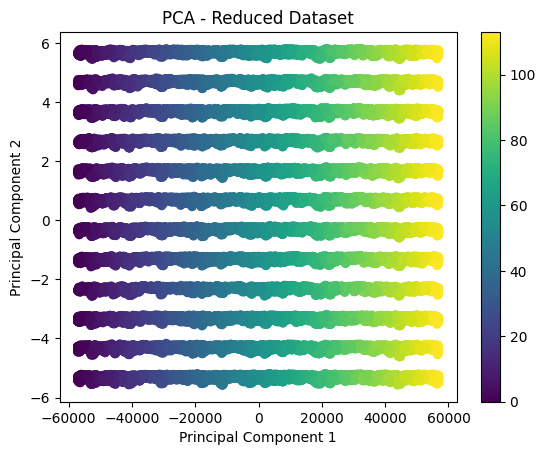

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA with 2 components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize PCA-reduced dataset
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA - Reduced Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

(2) t-SNE (t-distributed Stochastic Neighbor Embedding)

t-SNE focuses on preserving the local structure of the data, which is useful for visualizing clusters. In this case, we ploted the t-SNE reduced data and observed how well-separated the different genre clusters are. t-SNE helps us understand the relationship between instances in terms of their neighborhood proximity, which is very important for genre classification where similar genres might cluster together.

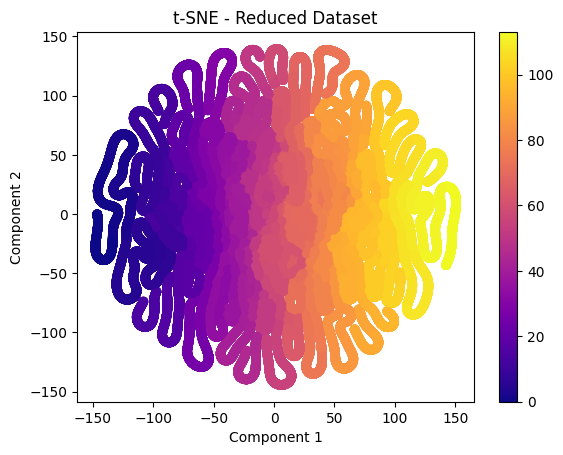

In [14]:
from sklearn.manifold import TSNE

# t-SNE for dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Visualize t-SNE-reduced dataset
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='plasma')
plt.title('t-SNE - Reduced Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

**Effect of Reduction**

PCA maintains a more global structure but may fail to show clear clusters.

t-SNE shows clearer, more localized clusters, making it easier to identify genres that are closely related.

**4. CLASSIFICATION**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Function to train and evaluate classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test):
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"\n{name} Classification Report:")
        print(classification_report(y_test, y_pred))

In [16]:
# Classification on Original Dataset
print("Original Dataset:")
evaluate_classifiers(X_train, X_test, y_train, y_test)

Original Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.26       311
           1       0.60      0.50      0.55       297
           2       0.33      0.06      0.11       313
           3       0.32      0.37      0.34       293
           4       0.43      0.76      0.55       275
           5       0.24      0.17      0.20       277
           6       0.74      0.42      0.54       319
           7       0.46      0.31      0.37       301
           8       0.00      0.00      0.00       322
           9       0.30      0.12      0.17       292
          10       0.14      0.33      0.20       285
          11       0.00      0.00      0.00       317
          12       0.33      0.00      0.01       301
          13       0.21      0.59      0.30       294
          14       0.14      0.01      0.02       303
          15       0.23      0.29      0.26       287
          16       0.29      0.69    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       297
           2       1.00      1.00      1.00       313
           3       1.00      1.00      1.00       293
           4       1.00      1.00      1.00       275
           5       1.00      1.00      1.00       277
           6       1.00      1.00      1.00       319
           7       1.00      1.00      1.00       301
           8       1.00      1.00      1.00       322
           9       1.00      1.00      1.00       292
          10       0.99      1.00      1.00       285
          11       1.00      1.00      1.00       317
          12       1.00      1.00      1.00       301
          13       1.00      1.00      1.00       294
          14       1.00      1.00      1.00       303
          15       1.00      1.00      1.00       287
          16       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       297
           2       1.00      1.00      1.00       313
           3       1.00      1.00      1.00       293
           4       1.00      1.00      1.00       275
           5       1.00      1.00      1.00       277
           6       1.00      1.00      1.00       319
           7       1.00      1.00      1.00       301
           8       1.00      1.00      1.00       322
           9       1.00      1.00      1.00       292
          10       1.00      1.00      1.00       285
          11       1.00      1.00      1.00       317
          12       1.00      1.00      1.00       301
          13       1.00      1.00      1.00       294
          14       1.00      1.00      1.00       303
          15       1.00      1.00      1.00       287
          16       1.00      1.00      1.00       302

In [17]:
# Classification on Feature-Selected Dataset (Filter Method)
print("Feature-Selected Dataset (Filter):")
evaluate_classifiers(X_train_filtered, X_test_filtered, y_train, y_test)

Feature-Selected Dataset (Filter):


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.26       311
           1       0.60      0.50      0.55       297
           2       0.33      0.06      0.11       313
           3       0.32      0.37      0.34       293
           4       0.43      0.76      0.55       275
           5       0.24      0.17      0.20       277
           6       0.74      0.42      0.54       319
           7       0.46      0.31      0.37       301
           8       0.00      0.00      0.00       322
           9       0.30      0.12      0.17       292
          10       0.14      0.33      0.20       285
          11       0.00      0.00      0.00       317
          12       0.33      0.00      0.01       301
          13       0.21      0.59      0.30       294
          14       0.14      0.01      0.02       303
          15       0.23      0.29      0.26       287
          16       0.29      0.69    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       297
           2       1.00      1.00      1.00       313
           3       1.00      1.00      1.00       293
           4       1.00      1.00      1.00       275
           5       1.00      1.00      1.00       277
           6       1.00      1.00      1.00       319
           7       1.00      1.00      1.00       301
           8       1.00      1.00      1.00       322
           9       1.00      1.00      1.00       292
          10       1.00      1.00      1.00       285
          11       1.00      1.00      1.00       317
          12       1.00      1.00      1.00       301
          13       1.00      1.00      1.00       294
          14       1.00      1.00      1.00       303
          15       1.00      1.00      1.00       287
          16       1.00      1.00      1.00       302

In [18]:
# Classification on Feature-Selected Dataset (RFE)
print("Feature-Selected Dataset (RFE):")
evaluate_classifiers(X_train_rfe, X_test_rfe, y_train, y_test)

Feature-Selected Dataset (RFE):

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.09      0.10       311
           1       0.23      0.12      0.16       297
           2       0.00      0.00      0.00       313
           3       0.07      0.03      0.04       293
           4       0.25      0.34      0.29       275
           5       0.01      0.01      0.01       277
           6       0.42      0.43      0.42       319
           7       0.26      0.20      0.23       301
           8       0.00      0.00      0.00       322
           9       0.15      0.02      0.04       292
          10       0.18      0.19      0.18       285
          11       0.08      0.00      0.01       317
          12       0.14      0.15      0.14       301
          13       0.31      0.42      0.35       294
          14       0.21      0.36      0.26       303
          15       0.13      0.18      0.15       287
     

In [19]:
# Classification on PCA-Reduced Dataset
print("PCA-Reduced Dataset:")
evaluate_classifiers(X_train_pca, X_test_pca, y_train, y_test)

PCA-Reduced Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.45      0.08       311
           1       0.02      0.65      0.04       297
           2       0.00      0.00      0.00       313
           3       0.00      0.00      0.00       293
           4       0.00      0.00      0.00       275
           5       0.00      0.00      0.00       277
           6       0.00      0.00      0.00       319
           7       0.00      0.00      0.00       301
           8       0.00      0.00      0.00       322
           9       0.00      0.00      0.00       292
          10       0.00      0.00      0.00       285
          11       0.00      0.00      0.00       317
          12       0.00      0.00      0.00       301
          13       0.00      0.00      0.00       294
          14       0.00      0.00      0.00       303
          15       0.00      0.00      0.00       287
          16       0.00      0.00    

**5. ANALYSIS AND CONCLUSION**

**Impact of Feature Selection**

Feature Selection (Filter and RFE): Both methods reduce the number of features, which should generally improve computational efficiency and potentially reduce overfitting. However, the performance can differ:

Filter-based selection might retain features that are not necessarily the best for predicting the target variable.

RFE is more likely to improve model performance because it focuses on selecting features that directly impact classification accuracy.

**Impact of Feature Reduction**

PCA: By reducing the number of features to just a few principal components, PCA can maintain or slightly improve classifier performance while greatly reducing computational costs.

t-SNE: t-SNE is primarily used for visualization and might not improve classifier performance significantly, but it will give a better visual understanding of the data's structure.

**Significant Differences**

Accuracy: Feature selection (especially RFE) might yield the highest accuracy because it optimizes feature relevance for classification.

Efficiency: Feature reduction (PCA) generally leads to faster training and inference times due to fewer features, but it may sometimes compromise on accuracy.

Recommendations:
Use feature selection when you want to retain meaningful features that improve model accuracy, especially when you have domain knowledge about the dataset and the number of features is manageable.
Use feature reduction when you have a very large dataset with many features, and you are concerned about computational efficiency, but you still want to retain the essence of the data.